In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
column_names = ["text", "is_hate"]

df = pd.read_csv('1.preprocessed_data.csv', on_bad_lines='skip', sep=",", encoding='iso-8859-1', header=0, names=column_names)
df['is_hate'] = df['is_hate'].astype(bool)
df['text'] = df['text'].astype('str')
df.head()

,text,is_hate
0,ponnayo danne kellek aduwa gaman laga inna kol...,True
1,ape harak samjeta eka honda adrshyak,False
2,tpita pisuda yako man htuwe atta kiyala aiyo,False
3,kimbak eduwoth ape untath amma thaththawath pe...,True
4,lisan nathawa yanna puluwan yako api dannawa o...,False


In [3]:
import pandas as pd
from llama_index import Llama


# 1. Initialize Llama and provide the task type (classification in this case)
llama = Llama(task_type="classification")

# 2. Train the model
# llama.train(df, x_col="text", y_col="is_hate")

# 3. Evaluate model performance on a validation set
# For this, you can split your dataset into training and validation using train_test_split or any other method

from sklearn.model_selection import train_test_split

train_df, valid_df = train_test_split(df, test_size=0.2, random_state=42)

# Training the model on train_df
llama.train(train_df, x_col="text", y_col="is_hate")

# Evaluating the model on valid_df
accuracy = llama.evaluate(valid_df, x_col="text", y_col="is_hate")
print(f"Accuracy: {accuracy*100:.2f}%")

# 4. Predicting for a new text
sample_text = "Your work is horrible!"
prediction = llama.predict([sample_text])[0]
print(f"'{sample_text}' is classified as {'hate' if prediction else 'not hate'}")

# If you want to save and reload the model
llama.save("hate_speech_model")
loaded_llama = Llama.load("hate_speech_model")


ImportError: cannot import name 'TypeAliasType' from 'typing_extensions' (/Users/meuru/Projects/icbt/project/venv/lib/python3.9/site-packages/typing_extensions.py)

In [3]:
from sklearn.metrics import classification_report
true_labels = val_dataset.targets.tolist()
predicted_labels = predictions.predictions.argmax(-1).tolist()

report = classification_report(true_labels, predicted_labels, target_names=['Not Hate', 'Hate'])
print(report)


              precision    recall  f1-score   support

    Not Hate       0.80      0.87      0.84       132
        Hate       0.78      0.69      0.73        89

    accuracy                           0.80       221
   macro avg       0.79      0.78      0.78       221
weighted avg       0.80      0.80      0.79       221



In [4]:
# Save the model
model.save_pretrained("2.14 gpt_model")

# Save the tokenizer
tokenizer.save_pretrained("2.14 gpt_tokenizer")

Configuration saved in 2.14 gpt_model/config.json
Model weights saved in 2.14 gpt_model/pytorch_model.bin
tokenizer config file saved in 2.14 gpt_tokenizer/tokenizer_config.json
Special tokens file saved in 2.14 gpt_tokenizer/special_tokens_map.json


('2.14 gpt_tokenizer/tokenizer_config.json',
 '2.14 gpt_tokenizer/special_tokens_map.json',
 '2.14 gpt_tokenizer/vocab.json',
 '2.14 gpt_tokenizer/merges.txt',
 '2.14 gpt_tokenizer/added_tokens.json')

In [5]:
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification

# Load the model
loaded_model = GPT2ForSequenceClassification.from_pretrained("2.14 gpt_model")

# Load the tokenizer
loaded_tokenizer = GPT2Tokenizer.from_pretrained("2.14 gpt_tokenizer")
                                                 
# Prediction function
def predict_hate_speech_from_saved(text, model, tokenizer):
    inputs = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=256,
        pad_to_max_length=True,
        return_token_type_ids=True,
        truncation=True,
        padding='max_length',
        return_tensors="pt"
    )
    with torch.no_grad():
        logits = model(**inputs).logits
    probs = logits.softmax(dim=1)
    return "Hate" if probs[0, 1] > 0.5 else "Not Hate"

# Example
text = "Your example text here"
print(predict_hate_speech_from_saved(text, loaded_model, loaded_tokenizer))


loading configuration file 2.14 gpt_model/config.json
Model config GPT2Config {
  "_name_or_path": "gpt2-medium",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2ForSequenceClassification"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 1024,
  "n_head": 16,
  "n_inner": null,
  "n_layer": 24,
  "n_positions": 1024,
  "n_special": 0,
  "pad_token_id": 50256,
  "predict_special_tokens": true,
  "problem_type": "single_label_classification",
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max

Not Hate


In [6]:
print(predict_hate_speech_from_saved("kalakanni deshapaluwo", loaded_model, loaded_tokenizer))

Hate


In [7]:
print(predict_hate_speech("kalakanni deshapaluwo"))

Hate


[[115  17]
 [ 28  61]]


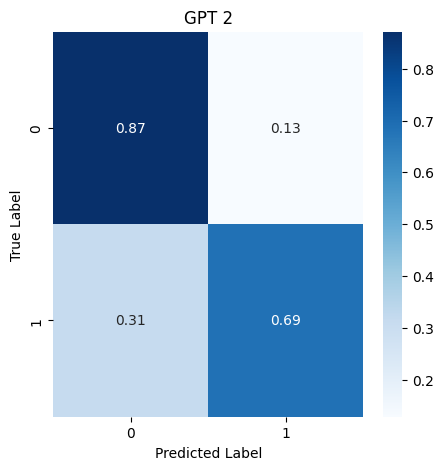

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# After making predictions
true_labels = val_dataset.targets.tolist()
predicted_labels = predictions.predictions.argmax(-1).tolist()

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print(cm)

# Normalize the confusion matrix
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


# Plot the normalized confusion matrix as a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap='Blues')
plt.title('GPT 2')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


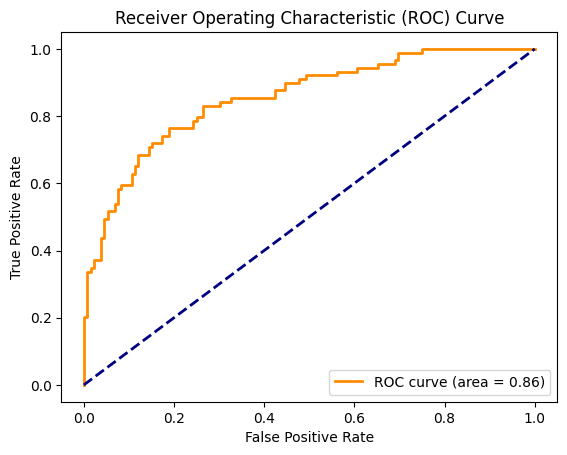

In [9]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(true_labels, predictions.predictions[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [12]:
import pickle

# save the values to a file
print(report)
report = classification_report(true_labels, predicted_labels, target_names=['True', 'False'])
with open('2.14 GPT2.pkl', 'wb') as f:
    pickle.dump({
        'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc, 'cm_percentage': cm_percentage, 'report': report
    }, f)


              precision    recall  f1-score   support

    Not Hate       0.80      0.87      0.84       132
        Hate       0.78      0.69      0.73        89

    accuracy                           0.80       221
   macro avg       0.79      0.78      0.78       221
weighted avg       0.80      0.80      0.79       221

